# Elastic and design response spectrum according to EN 1998-1-1:2004
## Eurocode 8: Design of structures for earthquake resistance
## Part 1: General rules, seismic actions and rules for buildings
## 3 Ground conditions and seismic action
### 3.2 Seismic action
#### 3.2.2.2 Horizontal elastic response spectrum
#### 3.2.2.3 Vertical elastic response spectrum
#### 3.2.2.5 Design spectrum for elastic analysis

2018-02-26 Pedro Biel

In [1]:
# Import Anaconda packages
# ------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Interactive plots? Replace `%matplotlib inline` by `%matplotlib`.

## 1. Scope

The scope of this study is to show the shapes of the elastic response spectrum and the shapes of the design spectrum for the elastic analysis for both horizontal directions $x$ and $y$ and for the vertical direction $z$ according to the Eurocode EN 1998-1-1:2004.

To that end, the class `SeismicAction` will be defined. The objects of the class `SeismicAction` will get us the parameters to define the values of the different spectrums.

As practical application of this study, diffrent files for the calculation program `Autodesk Robot Structural Analysis Professional` (`RSAPRO`) will be created. `RSAPRO` can read directly these files and proceed with the spectral calculation for the seismic load cases. These plain files could be used also for others purposes.

## 2. What Eurocode tell us

**3.2.2 Basic representation of the seismic action**

**3.2.2.1 General**

(1)P Within the scope of EN 1998 the earthquake motion at a given point on the surface is represented by an elastic ground acceleration response spectrum, henceforth called an "elastic response spectrum".

...

(3)P The horizontal seismic action is described by two orthogonal components assumed as being independent and represented by the same response spectrum.

(4) For the three components of the seismic action, one or more alternative shapes of response spectra may be adopted, depending on the seismic sources and the earthquake magnitudes generated from them.

...

**3.2.2.2 Horizontal elastic response spectrum**

(l)P For the horizontal components of the seismic action the elastic response spectrum $S_e(T)$ is defined by the following expressions (see Figure. 3.1):

<img src = '../png/Expressions 3.1-5.png'>

where

$S_e(T)$ is the elastic response spectrum;

$T$ is the vibration period of a linear single-degree-of-freedom system;

$a_g$ is the design ground acceleration on type A ground ($a_g = \gamma_I·a_{gR}$);

$T_B$ is the lower limit of the period of the constant spectral acceleration branch;

$T_C$ is the upper limit of the period of the constant spectral acceleration branch;

$T_D$ is the value defining the beginning of the constant displacement response range of the spectrum;

$S$ is the soil factor;

$\eta$ is the damping correction factor with a reference value of $\eta$ = 1 for 5 % viscous damping, see (3) of this subclause.

<img src = '../png/Figure 3.1.png'>

...

**3.2.2.3 Vertical elastic response spectrum**

(1)P The vertical component of the seismic action shall be represented by an elastic response spectrum, $S_{ve}(T)$, derived using expressions (3.8)-(3.11).

<img src = '../png/Expressions 3.8-11.png'>

...

**3.2.2.5 Design spectrum for elastic analysis**

...

(4)P For the horizontal components of the seismic action the design spectrum, $S_d(T)$, shall be defined by the following expressions:

<img src = '../png/Expressions 3.13-16.png'>

where

$a_g$, $S$, $T_C$ and $T_D$ are defined in 3.2.2.2;

$S_d(T)$ is the design spectrum;

$q$ is the behaviour factor;

$a_g$ is the design ground acceleration on type A ground ($a_g = \gamma_I·a_{gR}$);

$\beta$ is the lower bound factor for the horizontal design spectrum.

(5) For the vertical component of the seismic action the design spectrum is given by expressions (3.13) to (3.16), with the design ground acceleration in the vertical direction, $a_{vg}$ replacing $a_g$, $S$ taken as being equal to 1,0 and the other parameters as defined in 3.2.2.3.

...

## 3. The class SeimicAction

It would make more sense for the purpose of this Notebook to define the different expresions of the elastic and design spectrums of the Eurocode as functions of Python, however, I have defined them as a class. With this I try to maintain the spirit of code-recycling and I am able to re-use the code, for example in a GUI application for Python.

In [2]:
class SeismicAction:
    
    def __init__(self, agR, gI, ground_type, type_of_spectra, T, e, q, b):
        """
        3.2 Seismic action        
        3.2.1 Seismic zones
        3.2.2 Basic representation of the seismic action
        
        agR              : [g] Reference peak ground acceleration on type A ground (3.2.1 (3)).
        gI               : []  Importance factor (3.2.1 (3)).
        ground_type      : []  A, B, C, D, E (3.1.2).
        type_of_spectra  : []  1 or 2 (3.2.2.2 (2)P).
        T                : [s] Vibration period of a linear single-degree-of-freedom system.
        e                : []  Damping correction factor (3.2.2.2 (1)P).
        q                : []  Behaviour factor (6.1, 6.2, 6.3, 6.5, 6.11, 4.4.1 (2)).
        b                : []  Lower bound factor for the horizontal design spectrum (3.2.2.5 (4)P).
        """

        self.agR = agR
        self.gI = gI
        self.ground_type = ground_type
        self.type_of_spectra = type_of_spectra
        self.T = T
        self.e = e  # e = 1 for 5 % viscous damping.
        self.q = q
        self.b = b  # b = 0,2 is the recommended value.
        
        # Table 3.2: Values of the parameters describing the recomended Type 1 elsatic response spectra.

        # Table 3.3: Values of the parameters describing the recomended Type 2 elsatic response spectra.

        # See 3.2.2.2 (2)P to the recommended choice of the two types of spectra type 1 and type 2.
        
        # ground_type = (S, TB, TC, TD)

        self.__ground_types = {
            'A1': (1.00, 0.15, 0.40, 2.0),
            'B1': (1.20, 0.15, 0.50, 2.0),
            'C1': (1.15, 0.20, 0.60, 2.0),
            'D1': (1.35, 0.20, 0.80, 2.0),
            'E1': (1.40, 0.15, 0.50, 2.0),
            'A2': (1.00, 0.05, 0.25, 1.2),
            'B2': (1.35, 0.05, 0.25, 1.2),
            'C2': (1.50, 0.10, 0.25, 1.2),
            'D2': (1.80, 0.10, 0.30, 1.2),
            'E2': (1.60, 0.05, 0.25, 1.2)
            }
        
        # Table 3.4: Recommended values of parameters describing the vertical elastic response spectra.
        
        # ground_type = (avg/ag, TB, TC, TD)
        
        self.__vertical_ground_types = {
            '1': (0.90, 0.05, 0.15, 1.0),
            '2': (0.45, 0.05, 0.15, 1.0)
            }
    
    
    # 3.2.1 Seismic zones

    def design_ground_acceleration(self):
        
        ag = self.gI * self.agR
        
        return ag


    # 3.2.2.2 Horizontal elastic response spectrum
    
    # Values of the parameters describing the recommended type 1 and type 2 elastic response spectra.
    
    def __parameters(self):
        
        gt_ts = self.ground_type + self.type_of_spectra
        
        return self.__ground_types[gt_ts]
    
    def soil_factor(self):
        
        parameter = self.__parameters()
        S = parameter[0]
        
        return S
    
    def lower_limit_of_the_period(self):
        
        parameter = self.__parameters()
        TB = parameter[1]
        
        return TB
    
    def upper_limit_of_the_period(self):
        
        parameter = self.__parameters()
        TC = parameter[2]
        
        return TC
    
    def beginnig_of_the_constant_displacement(self):
        
        parameter = self.__parameters()
        TD = parameter[3]
        
        return TD
        
        
    def horizontal_elastic_response_spectrum(self):
        
        ag = self.design_ground_acceleration()        
        S = self.soil_factor()
        TB = self.lower_limit_of_the_period()
        TC = self.upper_limit_of_the_period()
        TD = self.beginnig_of_the_constant_displacement()
        T = self.T
        e = self.e

        SeT = []
        
        for t in T:
            
            if t <= TB:
            
                set1 = ag * S * (1 + t / TB * (e * 2.5 - 1))
                SeT.append(set1)
        
            elif t <= TC:
            
                set2 = ag * S * e * 2.5
                SeT.append(set2)
            
            elif t <= TD:
                
                set3 = ag * S * e * 2.5 * (TC / t)
                SeT.append(set3)
            
            elif t <= 4:
                
                set4 = ag * S * e * 2.5 * (TC * TD / t ** 2)
                SeT.append(set4)
        
        return SeT
    
    
    # 3.2.2.3 Vertical elastic response spectrum
    
    # Recommended values of parameters describing the vertical elastic response spectra.
    
    def __vertical_parameters(self):
        
        ts = self.type_of_spectra
        
        return self.__vertical_ground_types[ts]
    
    def vertical_design_ground_acceleration(self):
        
        ag = self.design_ground_acceleration()           
        vertical_parameter = self.__vertical_parameters()
        
        avg = vertical_parameter[0] * ag
        
        return avg
    
    def vertical_lower_limit_of_the_period(self):
        
        vertical_parameter = self.__vertical_parameters()
        TB = vertical_parameter[1]
        
        return TB
    
    def vertical_upper_limit_of_the_period(self):
        
        vertical_parameter = self.__vertical_parameters()
        TC = vertical_parameter[2]
        
        return TC
    
    def vertical_beginnig_of_the_constant_displacement(self):
        
        vertical_parameter = self.__vertical_parameters()
        TD = vertical_parameter[3]
        
        return TD
    
    
    def vertical_elastic_respose_spectrum(self):
        
        avg = self.vertical_design_ground_acceleration()        
        TB = self.vertical_lower_limit_of_the_period()
        TC = self.vertical_upper_limit_of_the_period()
        TD = self.vertical_beginnig_of_the_constant_displacement()
        T = self.T
        e = self.e

        SveT = []
        
        for t in T:
            
            if t <= TB:
            
                svet1 = avg * (1 + t / TB * (e * 3.0 - 1))
                SveT.append(svet1)
        
            elif t <= TC:
            
                svet2 = avg * e * 3.0
                SveT.append(svet2)
        
            elif t <= TD:
            
                svet3 = avg * e * 3.0 * (TC / t)
                SveT.append(svet3)
        
            elif t <= 4:
            
                svet4 = avg * e * 3.0 * (TC * TD / t ** 2)
                SveT.append(svet4)
        
        return SveT

    
    # 3.2.2.5 Design spectrum for elastic analysis
    
    def horizontal_design_spectrum(self):
        
        ag = self.design_ground_acceleration()
        S = self.soil_factor()
        TB = self.lower_limit_of_the_period()
        TC = self.upper_limit_of_the_period()
        TD = self.beginnig_of_the_constant_displacement()
        T = self.T
        q = self.q
        b = self.b
        
        SdT = []
        
        for t in T:
            
            if t <= TB:
                
                sdt1 = ag * S * (2/3 + (t / TB) * ((2.5 / q) - 2/3))
                SdT.append(sdt1)
            
            elif t <= TC:
                
                sdt2 = ag * S * 2.5 / q
                SdT.append(sdt2)
            
            elif t <= TD:
                
                sdt31 = ag * S * (2.5 / q) * (TC / t)
                sdt32 = b * ag
                sdt3 = max(sdt31, sdt32)
                SdT.append(sdt3)
            
            elif t <= 4:
                
                sdt41 = ag * S * (2.5 / q) * (TC * TD/ t ** 2)
                sdt42 = b * ag
                sdt4 = max(sdt41, sdt42)
                SdT.append(sdt4)
        
        return SdT
    
    
    def vertical_design_spectrum(self):
        
        avg = self.vertical_design_ground_acceleration()            # (3.2.2.5 (5)).
        S = 1                                                       # (3.2.2.5 (5)).
        TB = self.vertical_lower_limit_of_the_period()              # (3.2.2.5 (5)).
        TC = self.vertical_upper_limit_of_the_period()              # (3.2.2.5 (5)).
        TD = self.vertical_beginnig_of_the_constant_displacement()  # (3.2.2.5 (5)).
        T = self.T
        q = self.q                                                  # <= 1,5 (3.2.2.5 (6)).
        b = self.b
        
        SvdT = []
        
        for t in T:
        
            if t <= TB:
                
                svdt1 = avg * S * (2/3 + (t / TB) * ((2.5 / q) - 2/3))
                SvdT.append(svdt1)
            
            elif t <= TC:
                
                svdt2 = avg * S * 2.5 / q
                SvdT.append(svdt2)
            
            elif t <= TD:
                
                svdt31 = avg * S * (2.5 / q) * (TC / t)
                svdt32 = b * avg
                svdt3 = max(svdt31, svdt32)
                SvdT.append(svdt3)
            
            elif t <= 4:
                
                svdt41 = avg * S * (2.5 / q) * (TC * TD/ t ** 2)
                svdt42 = b * avg
                svdt4 = max(svdt41, svdt42)
                SvdT.append(svdt4)
        
        return SvdT

## 4 Input of parameters

Depending on the site conditions and the project specifications we could have just one horizontal design ground acceleration $a_g$ or perhaps two different values of the acceleration $a_g$ for each horizontal axis $x$ and $y$ (longitudinal and transversal directions). It could be also possible that we have to study the behaviour of our structure under the vertical seismic action, in such case we need the value of the vertical design ground acceleration.

In this Notebook it will be shown the results in the tree directions $x$, $y$ and $z$ (longitudinal, transversal and vertical directions).

The following parameters depend on the site conditions and their values can vary depending on the project specifications.

### Viscous damping $\zeta$

In [3]:
ζ = 0.05

### Design ground acceleration $a_g$

In [4]:
agx = 0.14   # [m/s] Design ground acceleracion in the longitudinal x direction on type A ground (3.2.1 (3)).
agy = 0.18   # [m/s] Design ground acceleracion in the transversal y direction on type A ground (3.2.1 (3)).
avgz = 0.16  # [m/s] Design ground acceleration in the vertical z direction (3.2.1 (3)).

### Importance factor $\gamma_I$

In [5]:
γI = 1.25  # [] (3.2.1 (3))

### Ground type

In [6]:
ground_type = 'B'  # [] A, B, C, D, E (3.1.2).

### Type of spectra

In [7]:
type_spectra = '1'  # [] 1 or 2 (3.2.2.2 (2)P).

### Vibration period of a linear single-degree-of-freedom system $T$

In [8]:
T = np.linspace(0, 4, 401)  # [s].

### Damping correction factor $\eta$

In [9]:
η = 1  # [] eta = 1 for 5 % viscous damping (3.2.2.2 (1)P).

### Behaviour factor $q$

In [10]:
q = 3  # [] 6.1, 6.2, 6.3, 6.5, 6.11, 4.4.1 (2)).

### Lower bound factor for the horizontal design $\beta$

In [11]:
β = 0.2  # [] beta = 0,2 is the recommended value (3.2.2.5 (4)P).

## 5 Values of the parameters describing the recommended elastic response spectra

### Seismic action in the longitudinal $x$ direction

In [12]:
seismicaction_x = SeismicAction(agx, γI, ground_type, type_spectra, T, η, q, β)

agx = seismicaction_x.design_ground_acceleration()

S = seismicaction_x.soil_factor()

TB = seismicaction_x.lower_limit_of_the_period()
TC = seismicaction_x.upper_limit_of_the_period()
TD = seismicaction_x.beginnig_of_the_constant_displacement()

SeTx = seismicaction_x.horizontal_elastic_response_spectrum()
SdTx = seismicaction_x.horizontal_design_spectrum()

### Seismic action in the transversal $y$ direction

In [13]:
seismicaction_y = SeismicAction(agy, γI, ground_type, type_spectra, T, η, q, β)

agy = seismicaction_y.design_ground_acceleration()

SeTy = seismicaction_y.horizontal_elastic_response_spectrum()
SdTy = seismicaction_y.horizontal_design_spectrum()

### Seismic action in the vertical $z$ direction

In [14]:
seismicaction_z = SeismicAction(avgz, γI, ground_type, type_spectra, T, η, q, β)

avgz = seismicaction_z.vertical_design_ground_acceleration()

TBv = seismicaction_z.vertical_lower_limit_of_the_period()
TCv = seismicaction_z.vertical_upper_limit_of_the_period()
TDv = seismicaction_z.vertical_beginnig_of_the_constant_displacement()

SveT = seismicaction_z.horizontal_elastic_response_spectrum()
SdTz = seismicaction_z.horizontal_design_spectrum()

## 6 Table with the values of the parameters describing the recommended elastic response spectra

In [15]:
table = pd.DataFrame([
        ('Horizontal x', type_spectra, ground_type, agx, S, TB, TC, TD),
        ('Horizontal y', type_spectra, ground_type, agy, S, TB, TC, TD),
        ('Vertical z', type_spectra, ground_type, avgz, S, TBv, TCv, TDv)],
        columns = ['Spectrum', 'Type of spectra', 'Ground type','$a_g$', '$S$', '$T_B [s]$', '$T_C [s]$', '$T_D [s]$'])
table

,Spectrum,Type of spectra,Ground type,$a_g$,$S$,$T_B [s]$,$T_C [s]$,$T_D [s]$
0,Horizontal x,1,B,0.175,1.2,0.15,0.50,2.0
1,Horizontal y,1,B,0.225,1.2,0.15,0.50,2.0
2,Vertical z,1,B,0.180,1.2,0.05,0.15,1.0


## 7 Spectral shapes

[]

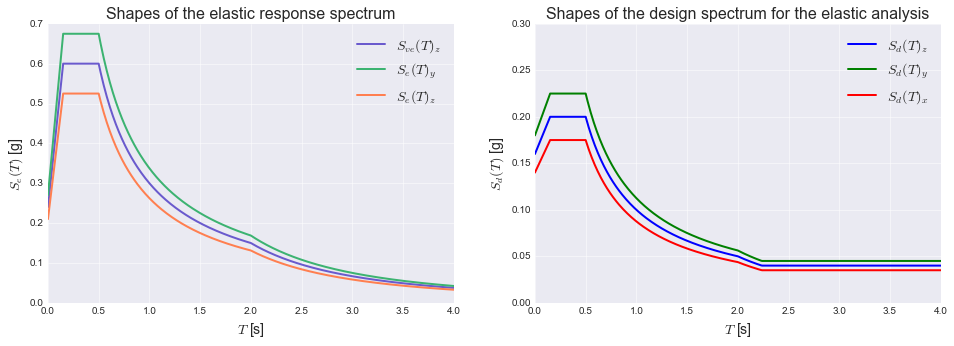

In [16]:
plt.style.use('seaborn-darkgrid') # Make the graphs a bit prettier

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.plot(T, SveT, color='slateblue',      linewidth=2, label='$S_{ve}(T)_z$')
ax1.plot(T, SeTy, color='mediumseagreen', linewidth=2, label='$S_e(T)_y$')
ax1.plot(T, SeTx, color='coral',          linewidth=2, label='$S_e(T)_z$')
ax2.plot(T, SdTz, color='b',              linewidth=2, label='$S_d(T)_z$')
ax2.plot(T, SdTy, color='g',              linewidth=2, label='$S_d(T)_y$')
ax2.plot(T, SdTx, color='r',              linewidth=2, label='$S_d(T)_x$')

ax1.axis([0, 4, 0, max(SveT) + 0.1])
ax2.axis([0, 4, 0, max(SdTz) + 0.1])

ax1.set_xlabel('$T$ [s]', fontsize=14)
ax1.set_ylabel('$S_e(T)$ [g]', fontsize=14)
ax1.legend(prop={'size': 14})
ax1.set_title('Shapes of the elastic response spectrum', fontsize=16)

ax2.set_xlabel('$T$ [s]', fontsize=14)
ax2.set_ylabel('$S_d(T)$ [g]', fontsize=14)
ax2.legend(prop={'size': 14})
ax2.set_title('Shapes of the design spectrum for the elastic analysis', fontsize=16)

plt.plot()

## 8 Spectral files for RSAPRO

In adition to this study, the spectral values will be saved ready for the use of the structural calculation program `Autodesk Robot Structural Analysis Professional` (`RSAPRO`). `RSAPRO` reads the data from plain text files with the extension `spe`.

The structure of these files is shown as follows:

    Line        Data                    Comment
    ----------------------------------------------------------------------------------------
    1           SECTRUM                 Standard title of the file.
    2           Name of the spectrum    Name of our spectrum.
    3           0  0  0  1              Whatever that means.
    4           0.05  Number            Viscous damping and number of points in the graphic.
    5 and on    0.00  1.372931          Abscissae (period [s]) and ordinates (spectrum [m/s²]).
    ...

The first four rows are according to the format that RSAPRO needs to "understand" the values of the spectrum of the file. For other purposes the fifth and successive rows can be read to get the values of the spectrum.

While the Eurocode defines the spectrums $S_e (T)$ and $S_d (T)$ as a function of the acceleration, `RSAPRO` takes into account the acceleration in the ordinates for each spectrum. Therefore, the values of the spectrums $S_e (T)$ and $S_d (T)$ shall be multiplied by $g_0$ = 9,80665 m/s².

### 8.1 The class SpectrumFile

In [17]:
class SpectrumFile:
    
    def __init__(self, filename, spectrum, z, T, S):
        """
        filename  : [string] Spectrum file name for RSAPRO.
        spectrum  : [string] Spectrum name.
        z         : []       Viscous damping.
        T         : [s]      Vibration period of a linear single-degree-of-freedom system.
        S         : [g_0]    Spectrum according to EN 1998-1-1:2004.
        """
        
        g0 = 9.80665 # [m/s²] Standard acceleration due to gravity.
        
        self.filename = filename
        self.spectrum = spectrum
        self.z = z
        self.T = T 
        self.S = np.array(S) * g0
        
        self.pfad_filename = '../spe/' + self.filename
        
        self.file()
        
    def file(self):
        
        with open(self.pfad_filename, 'w') as f:
    
            f.write('SECTRUM\n')
            f.write(self.spectrum + '\n')
            f.write('0  0  0  1\n')
            f.write('{}  {}\n'.format(str(self.z), str(len(self.S))))

            for t, s in zip(self.T, self.S):

                t = str('{:.2f}'.format(t))  # Convert t with two decimals to string.
                s = str('{:.6f}'.format(s))  # Convert s with six decimals to string.
                f.write('{}  {}\n'.format(t, s))

### 8.2 Elastic response spectrum

#### 8.2.1 Horizontal direction x

In [18]:
ERS_X = SpectrumFile('ERSx.spe', 'Elastic Response Spectrum X', ζ, T, SeTx)
ERS_X.file()

#### 8.2.2 Horizontal direction y

In [19]:
ERS_Y = SpectrumFile('ERSy.spe', 'Elastic Response Spectrum Y', ζ, T, SeTy)
ERS_Y.file()

#### 8.2.3 Vertical direction z

In [20]:
ERS_Z = SpectrumFile('ERSz.spe', 'Elastic Response Spectrum Z', ζ, T, SveT)
ERS_Z.file()

### 8.3 Design spectrum

#### 8.3.1 Horizontal direction x

In [21]:
DS_X = SpectrumFile('DSx.spe', 'Design Spectrum X', ζ, T, SdTx)
DS_X.file()

#### 8.3.2 Horizontal direction y

In [22]:
DS_Y = SpectrumFile('DSy.spe', 'Design Spectrum Y', ζ, T, SdTy)
DS_Y.file()

#### 8.3.3 Vertical direction z

In [23]:
DS_Z = SpectrumFile('DSz.spe', 'Design Spectrum Z', ζ, T, SdTz)
DS_Z.file()

## 9. Version

In [24]:
%load_ext version_information
%reload_ext version_information

%version_information numpy, pandas, matplotlib

Software versions
Python 3.5.1 64bit [MSC v.1900 64 bit (AMD64)]
IPython 4.1.2
OS Windows 10 10.0.16299 SP0
numpy 1.10.4
pandas 0.18.0
matplotlib 1.5.1
Mon Feb 26 19:11:40 2018 Hora estándar romance